In [1]:
import pysam
import numpy as np
import cPickle as pickle

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
import glob, os

In [6]:
import logging
logging.basicConfig(level=logging.INFO)

In [7]:
def umi_gene_db(in_file):
    
    st = pysam.AlignmentFile(in_file,"rb")
    st.reset()
    reads = st.fetch(until_eof=True)
    
    l = []
    for r in reads:
        if r.has_tag('NH') and r.get_tag('NH')==1 and r.has_tag('GE'):
            #nh = r.get_tag('NH')
            ge = r.get_tag('GE')
            xm = r.get_tag('XM')
            start = r.reference_start
            l.append((xm + ':' + ge , start))
    return l

In [8]:
def pos_per_reads_plot_data(in_file):
    
    db = umi_gene_db(in_file)
    df = pd.DataFrame(db, columns=['XG','POS'])
    dg = df.groupby(['XG'])['POS']
    
    dc = {}
    for xg, group in dg:
        i = len(group)
        if not i == 1:
            j = len(set(group))
            if i in dc:
                dc[i].append(j)
            else:
                dc.update({i:[j]})
    labels = [i for i,j in sorted(dc.items())]
    data = [j for i,j in sorted(dc.items())]
    
    return data, labels

In [11]:
def plot_boxes(labels, data, idx = 1, sample = ''):

    fig = plt.figure(figsize=(65,20))
    medianprops = dict(linewidth=2.5, color='r')

    plt.boxplot(data, sym='b', medianprops = medianprops)
    locs,_ = plt.xticks()
    plt.xticks(locs, labels, fontsize = 12, rotation='vertical')
    plt.yticks(fontsize = 16)
    plt.ylim(0,150)
    plt.xlabel('Number of reads per UMI in sample ' + sample, fontsize=20, labelpad=25)
    plt.ylabel('Number of disctinct positions per molecule', fontsize=20, labelpad=25)
    out_file = 'box_plot' + str(idx) + '.png'
    plt.savefig(out_file)

CPU times: user 58.2 s, sys: 434 ms, total: 58.6 s
Wall time: 58.7 s


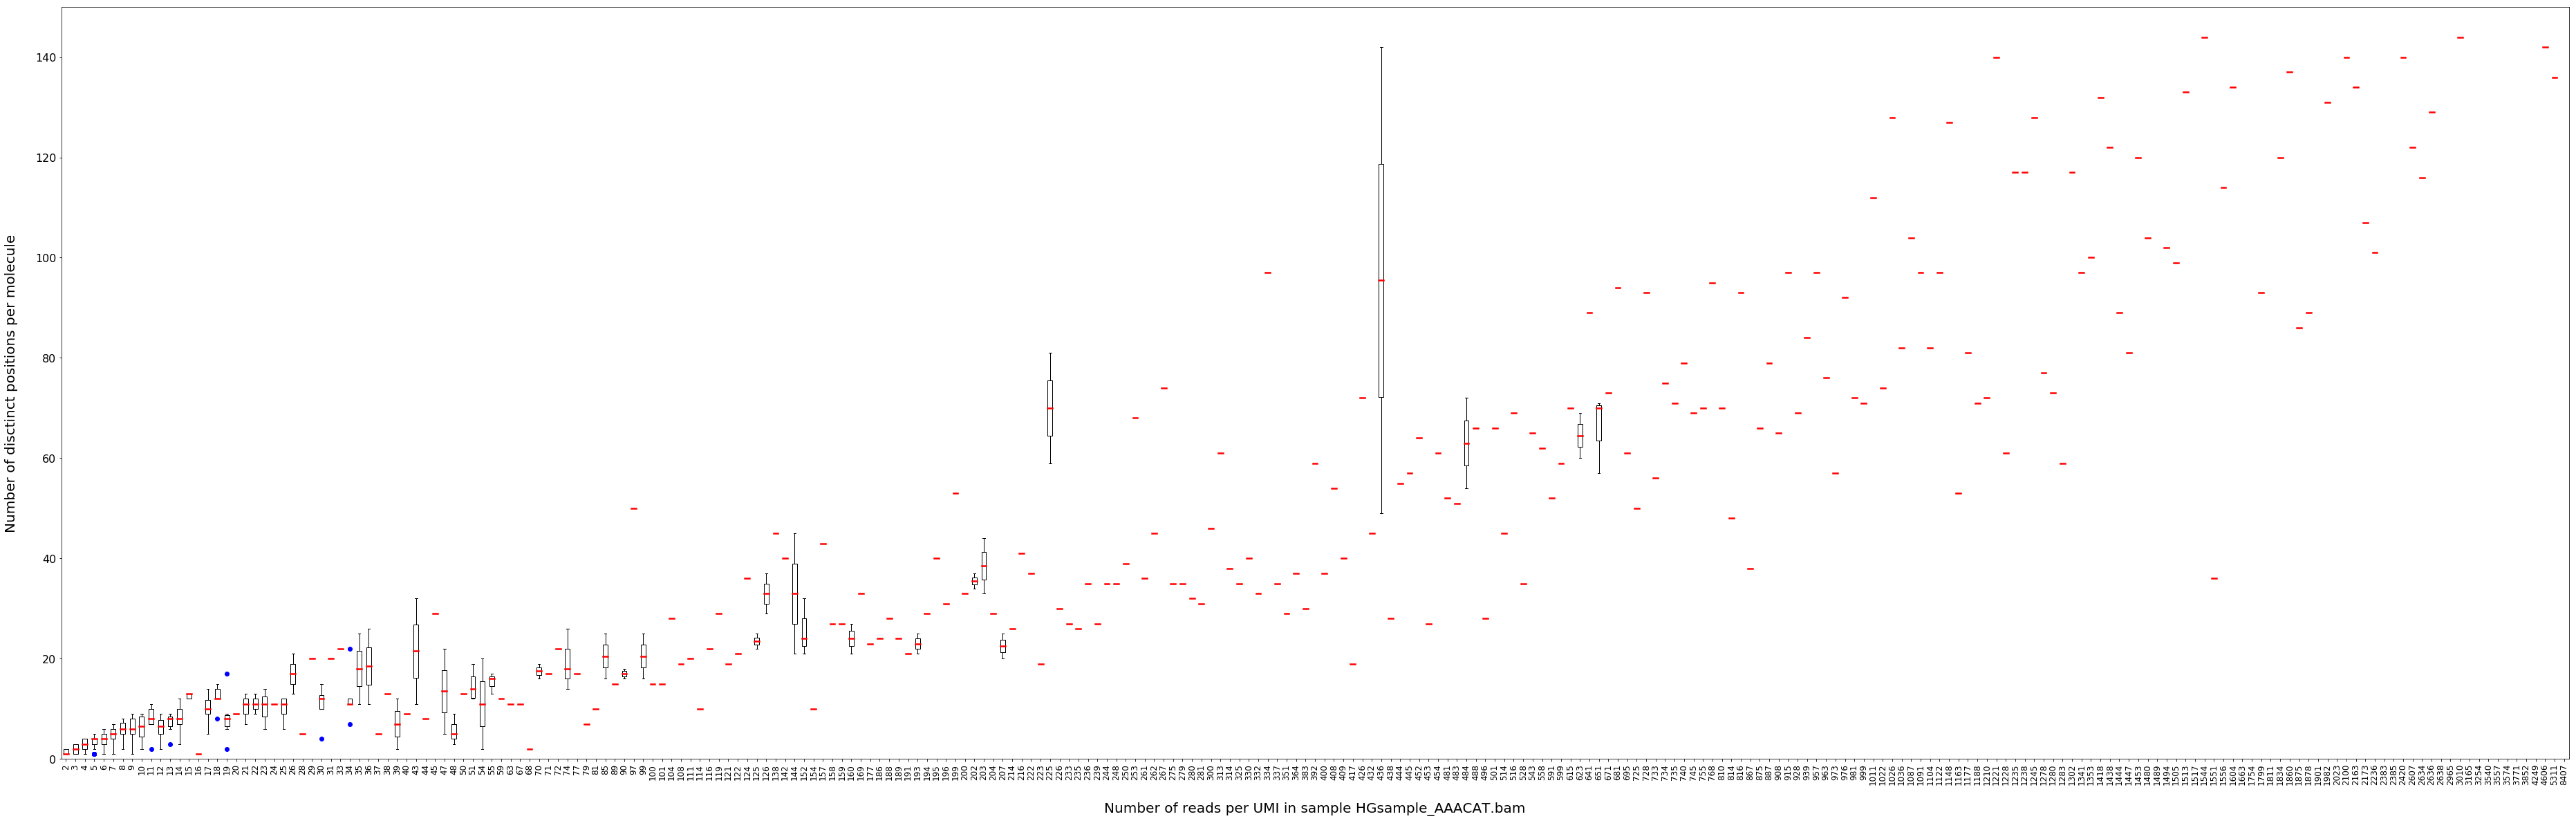

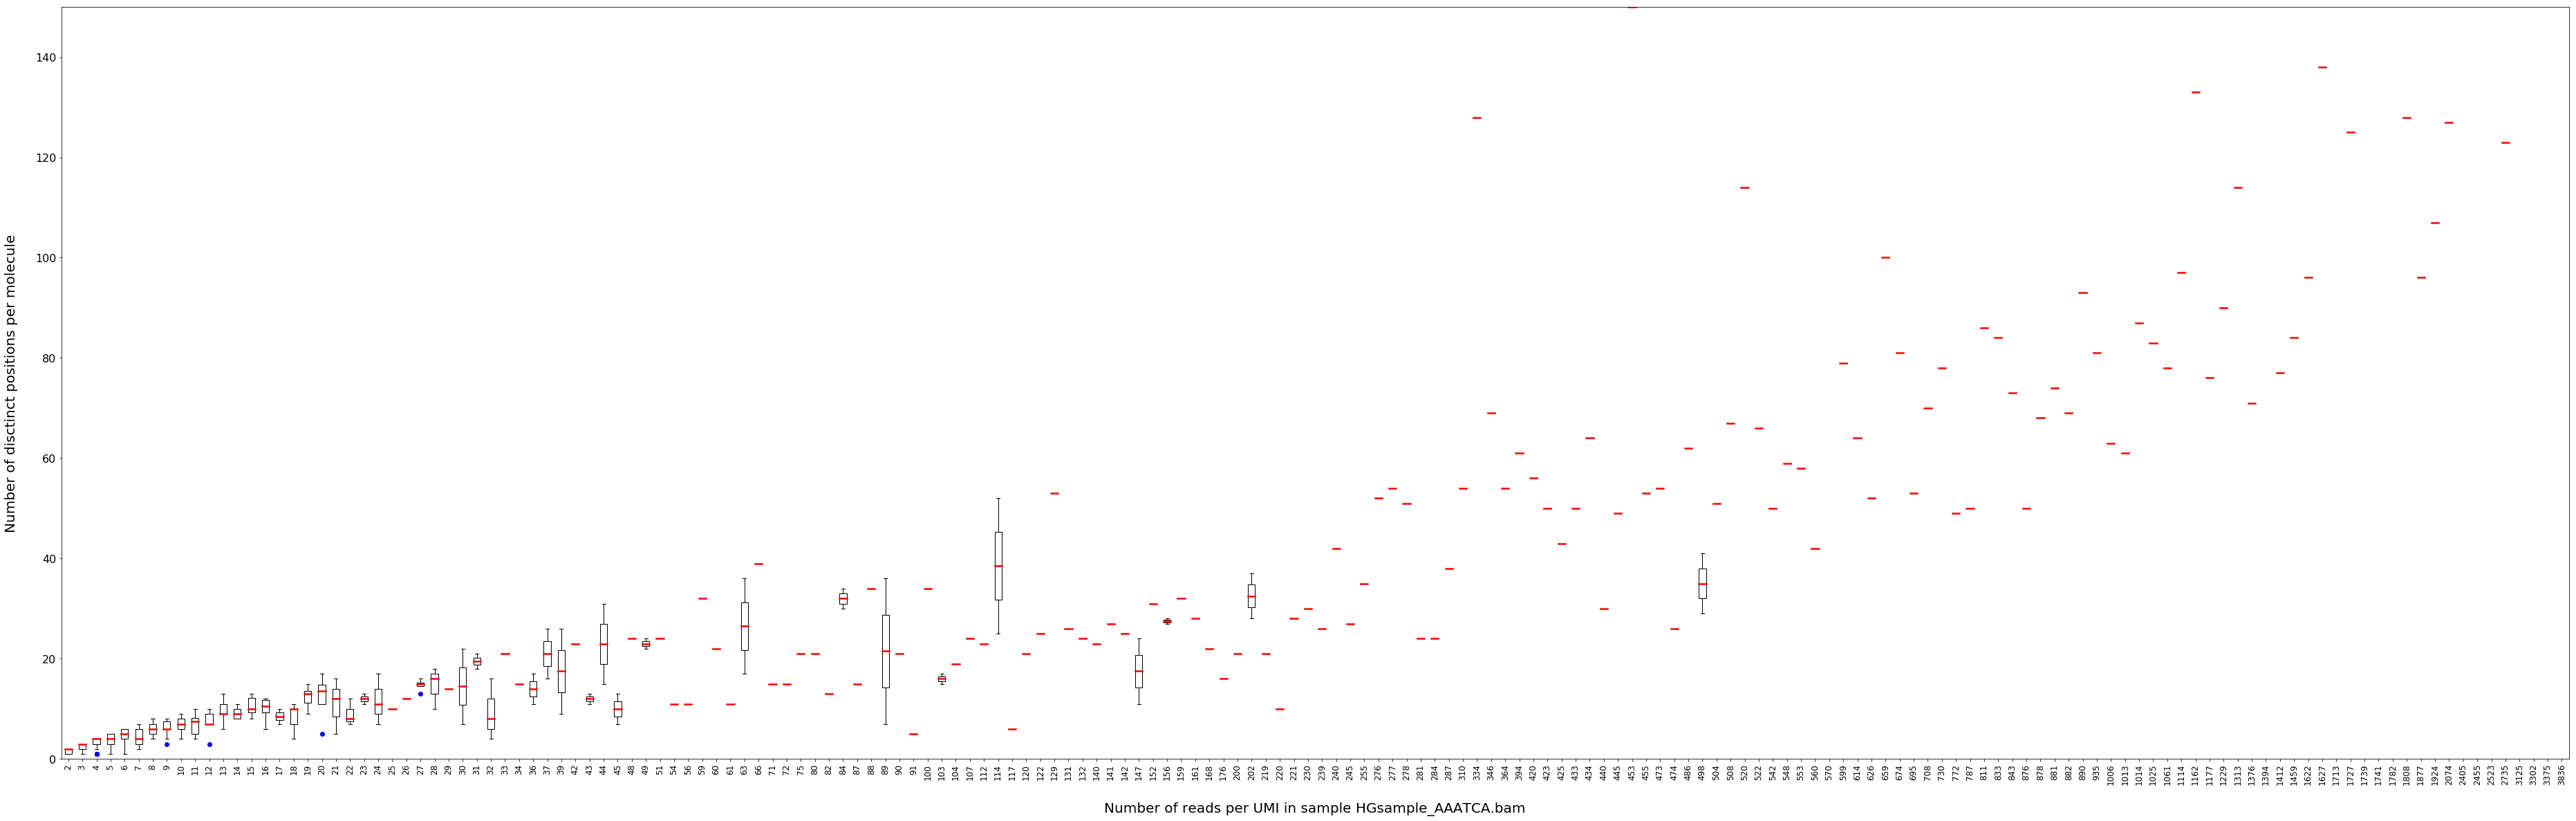

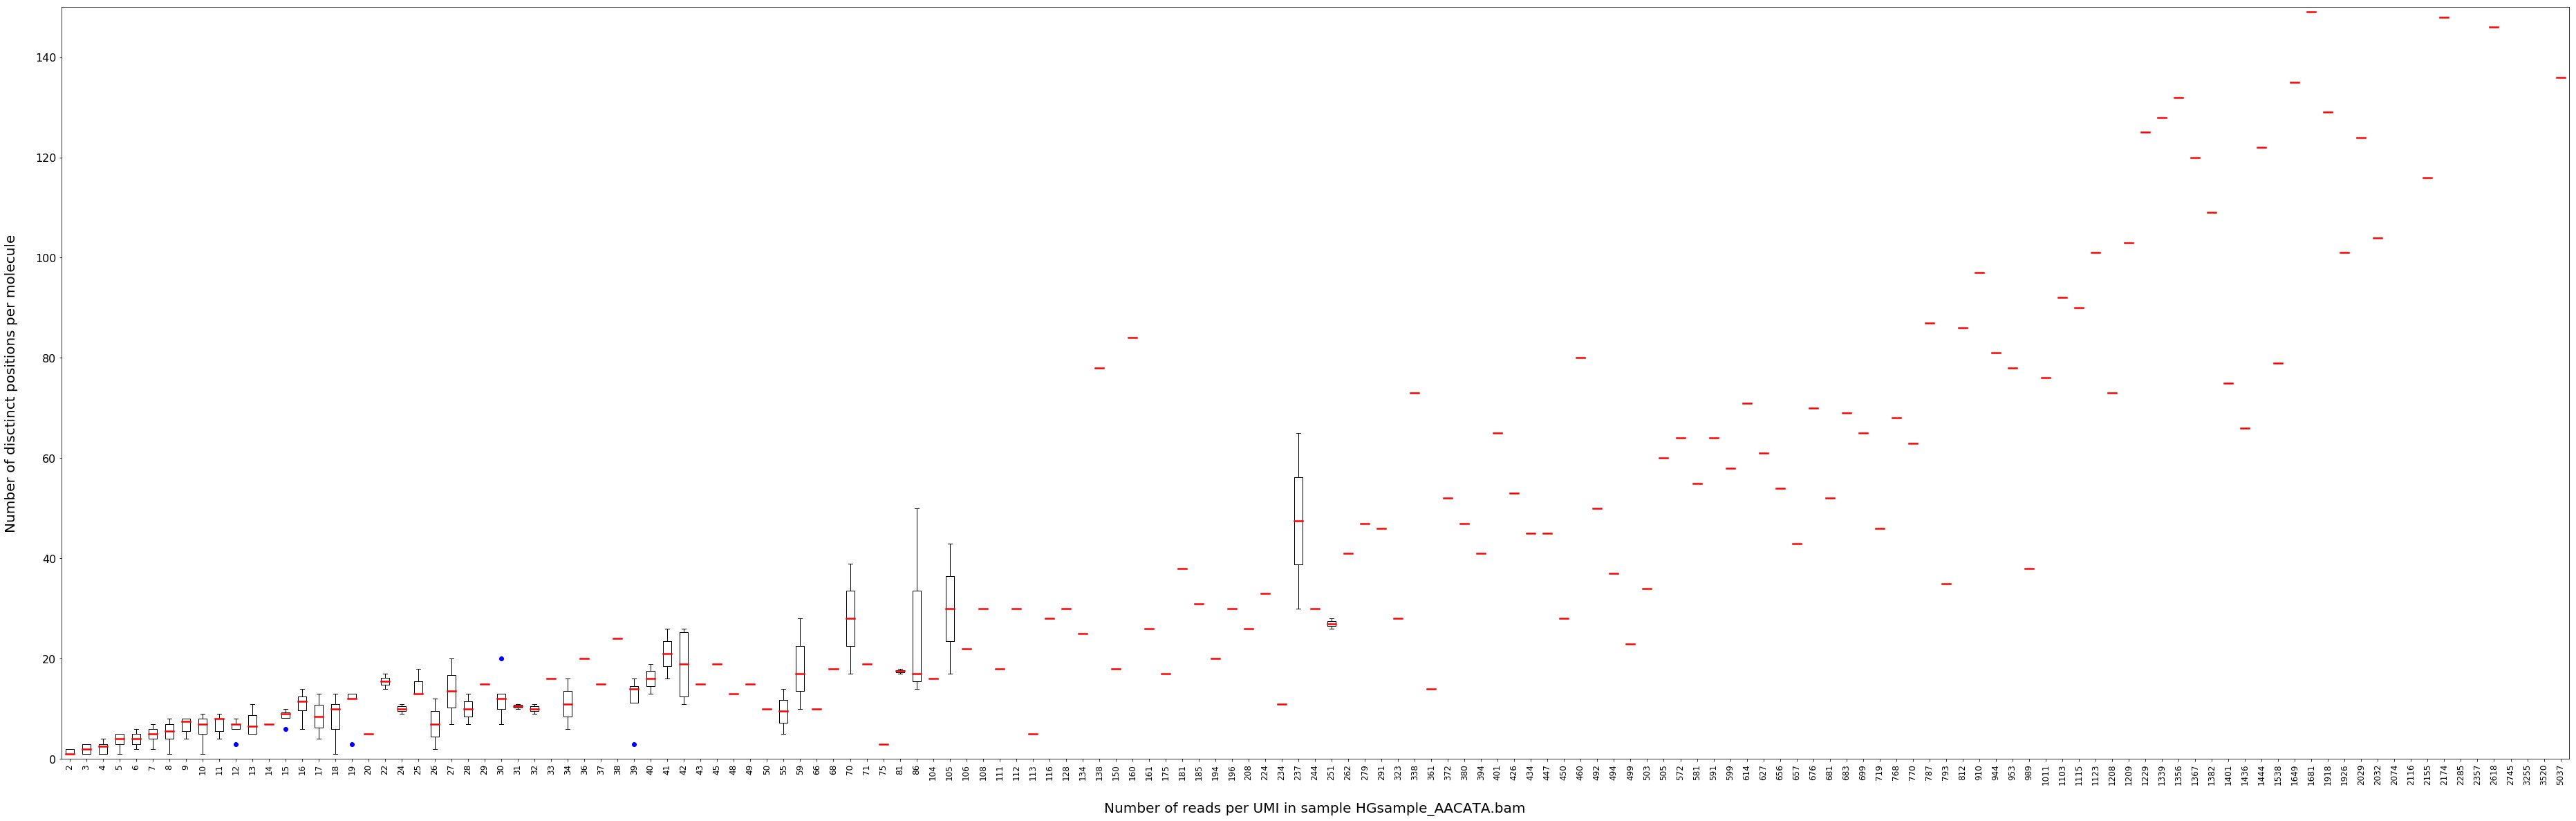

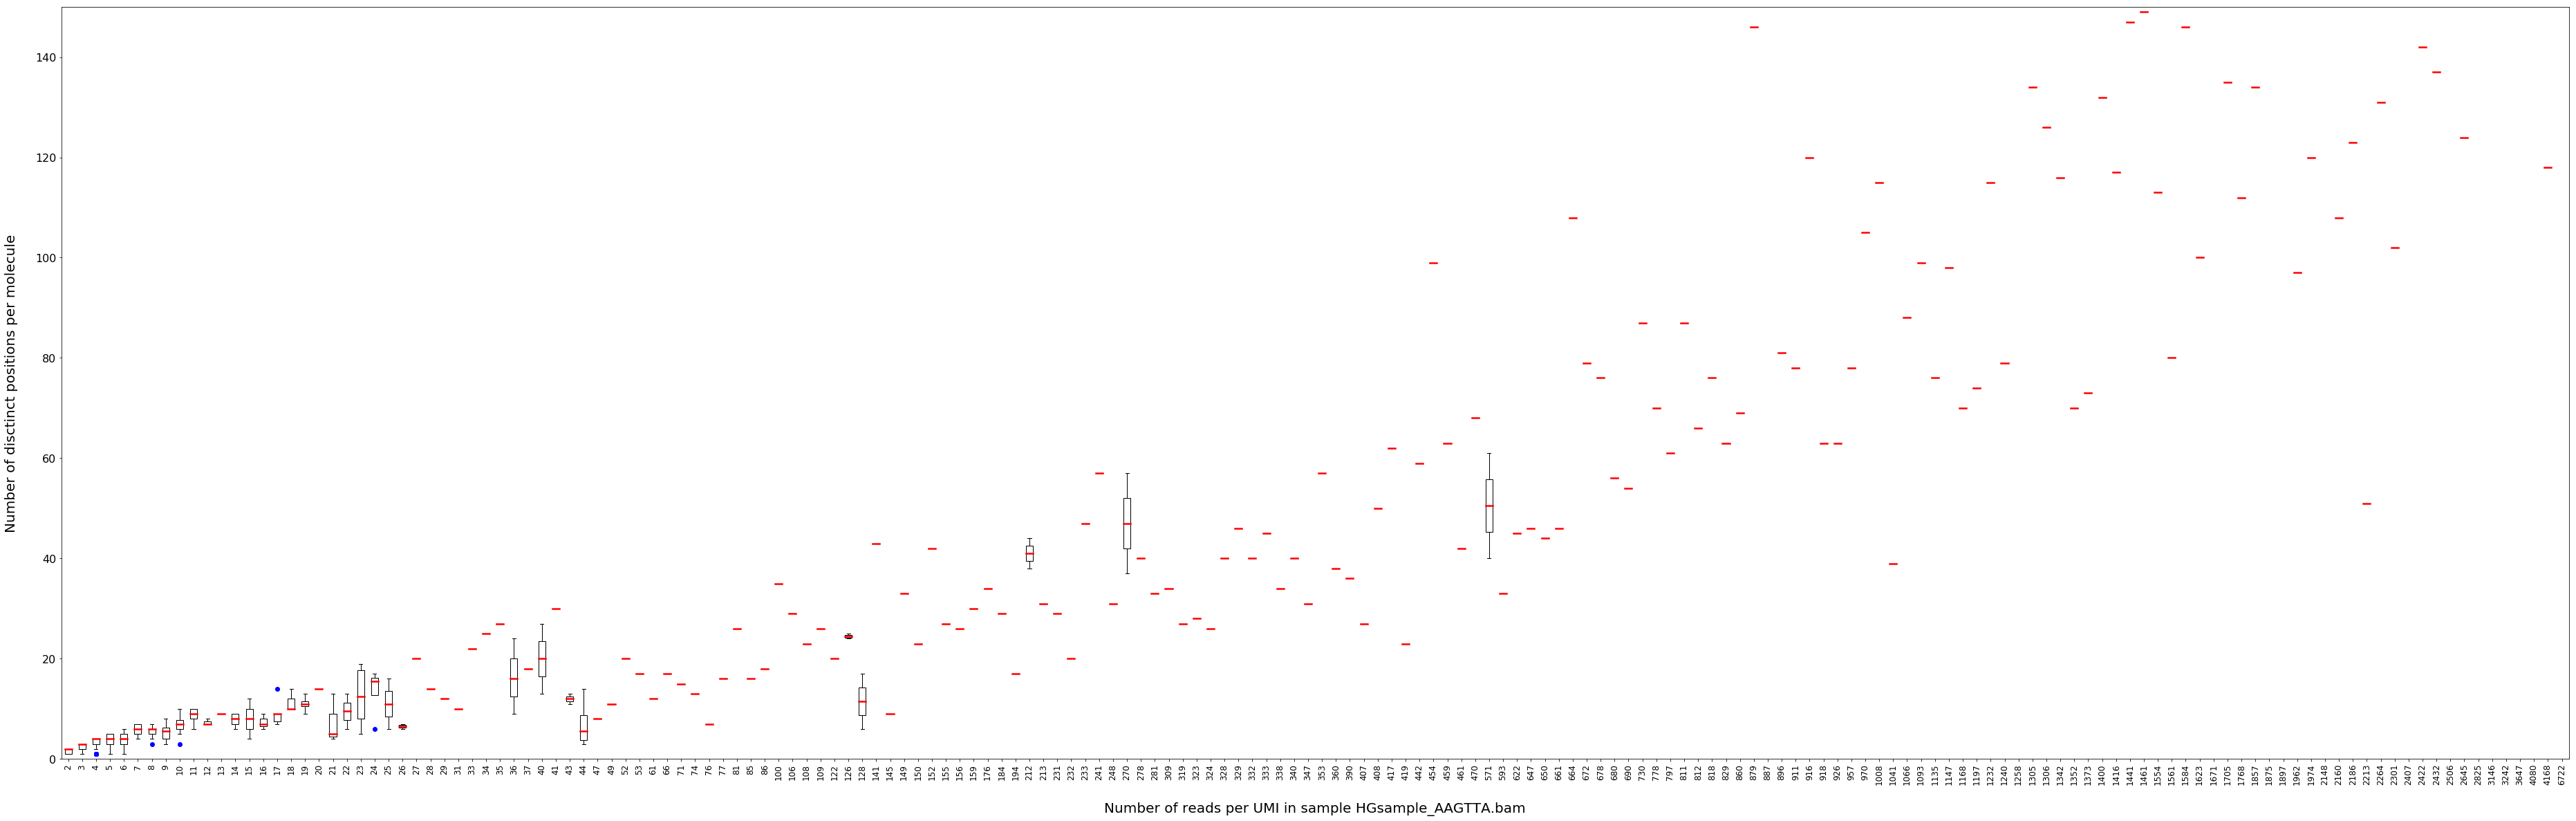

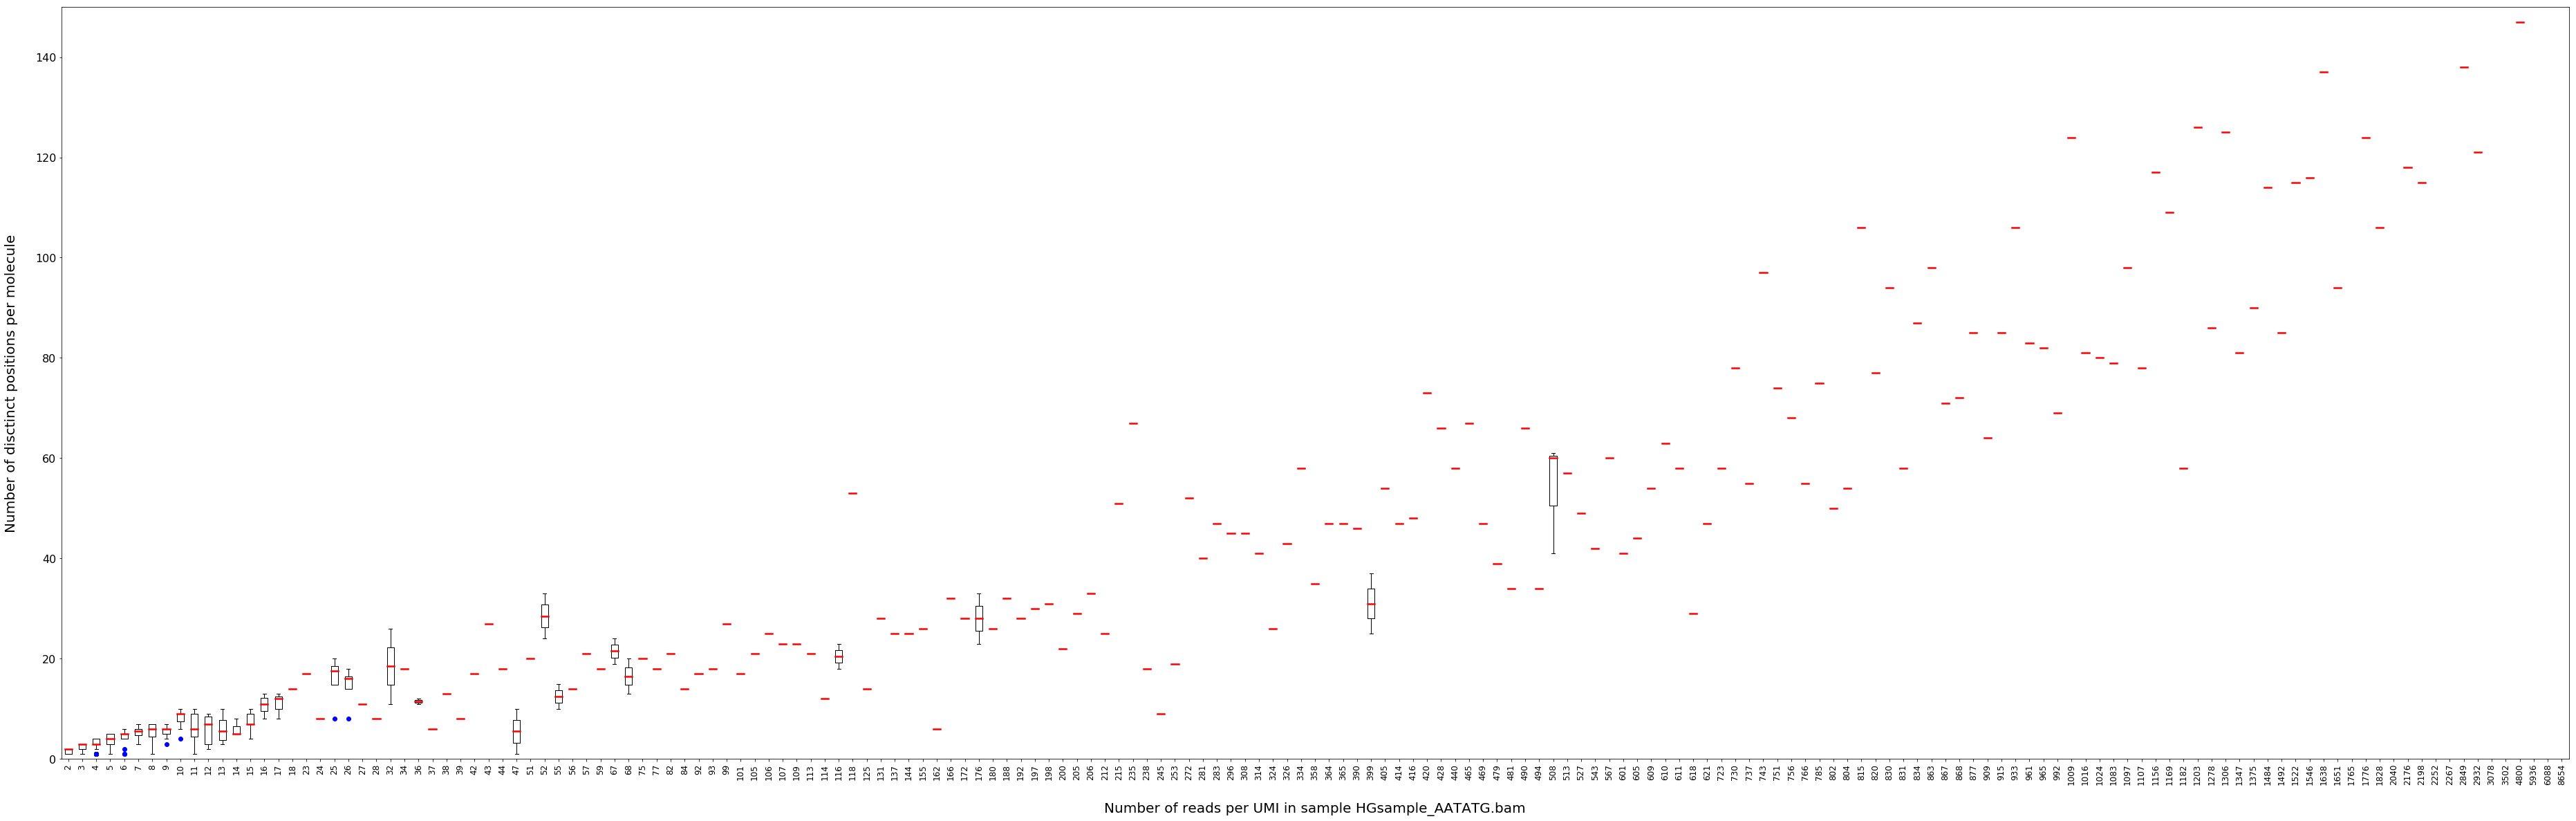

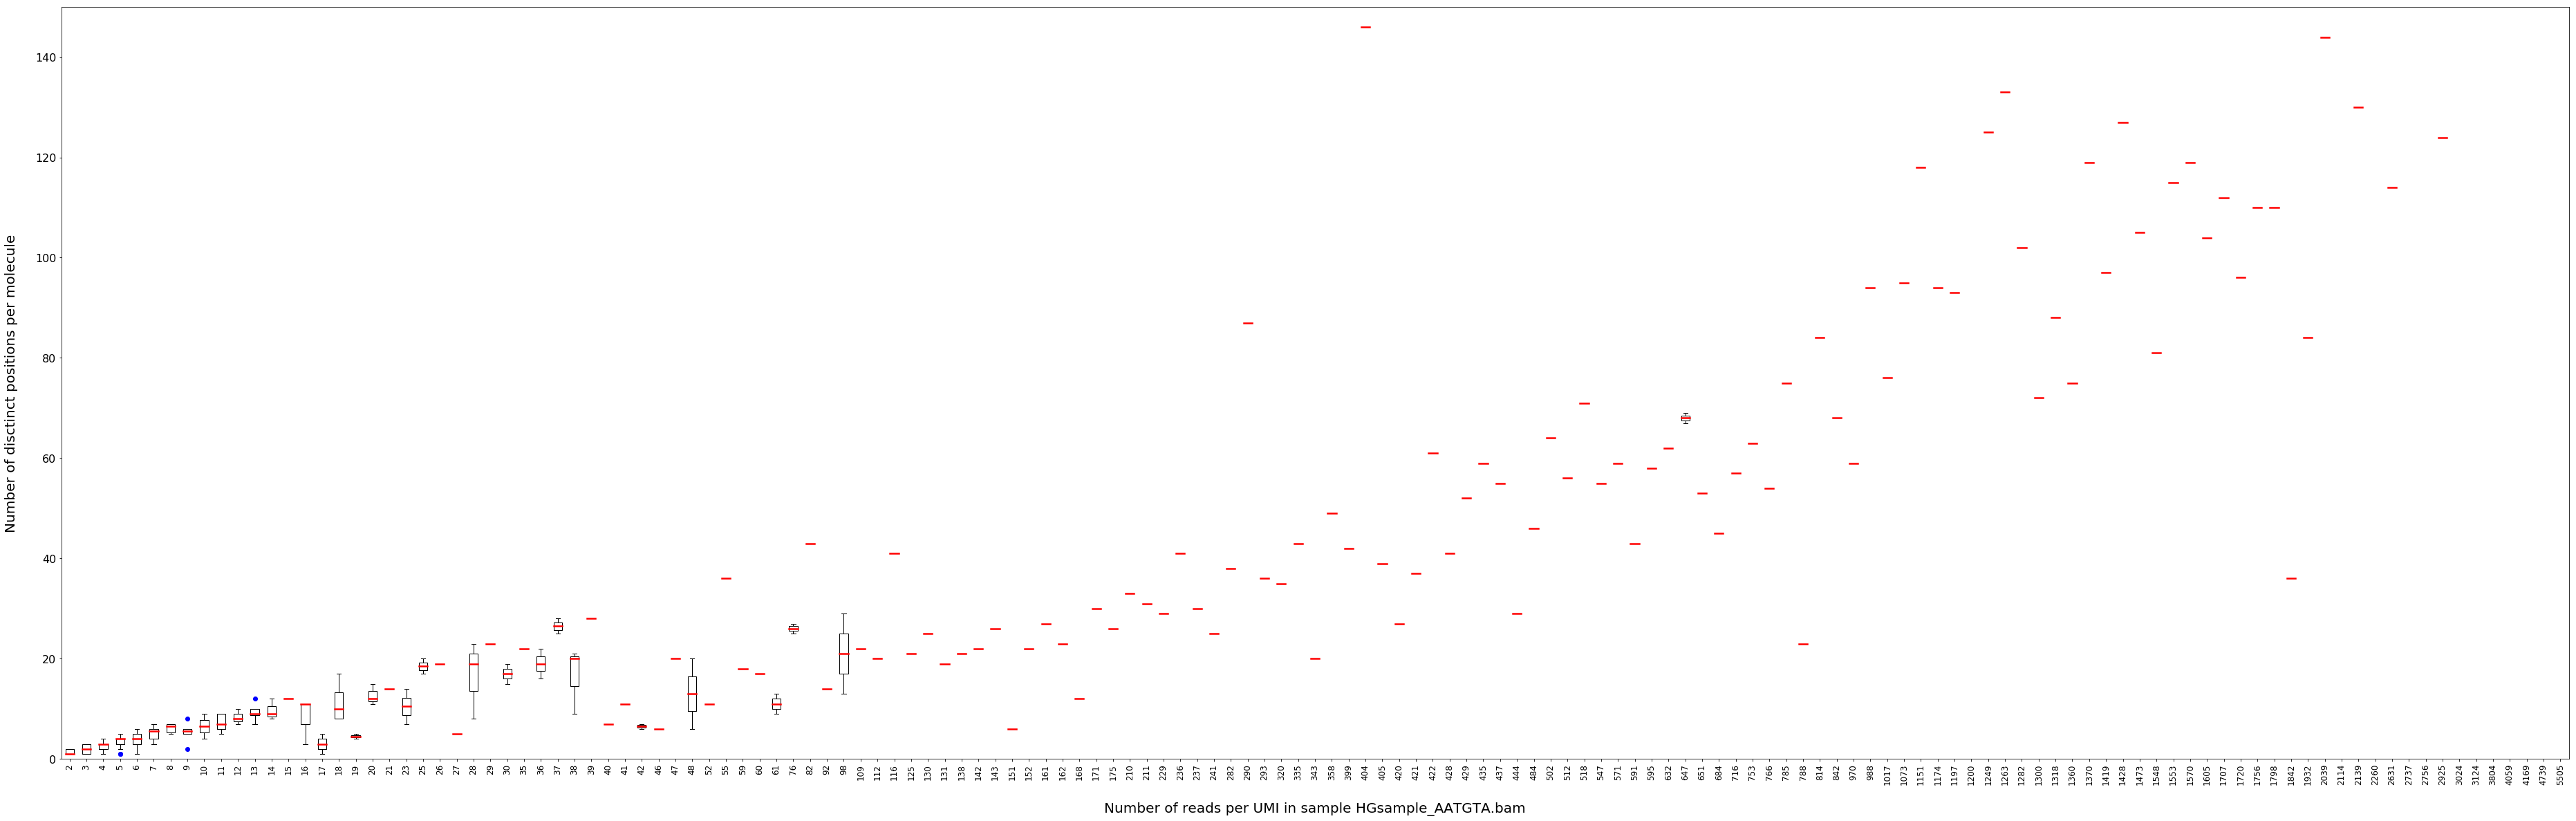

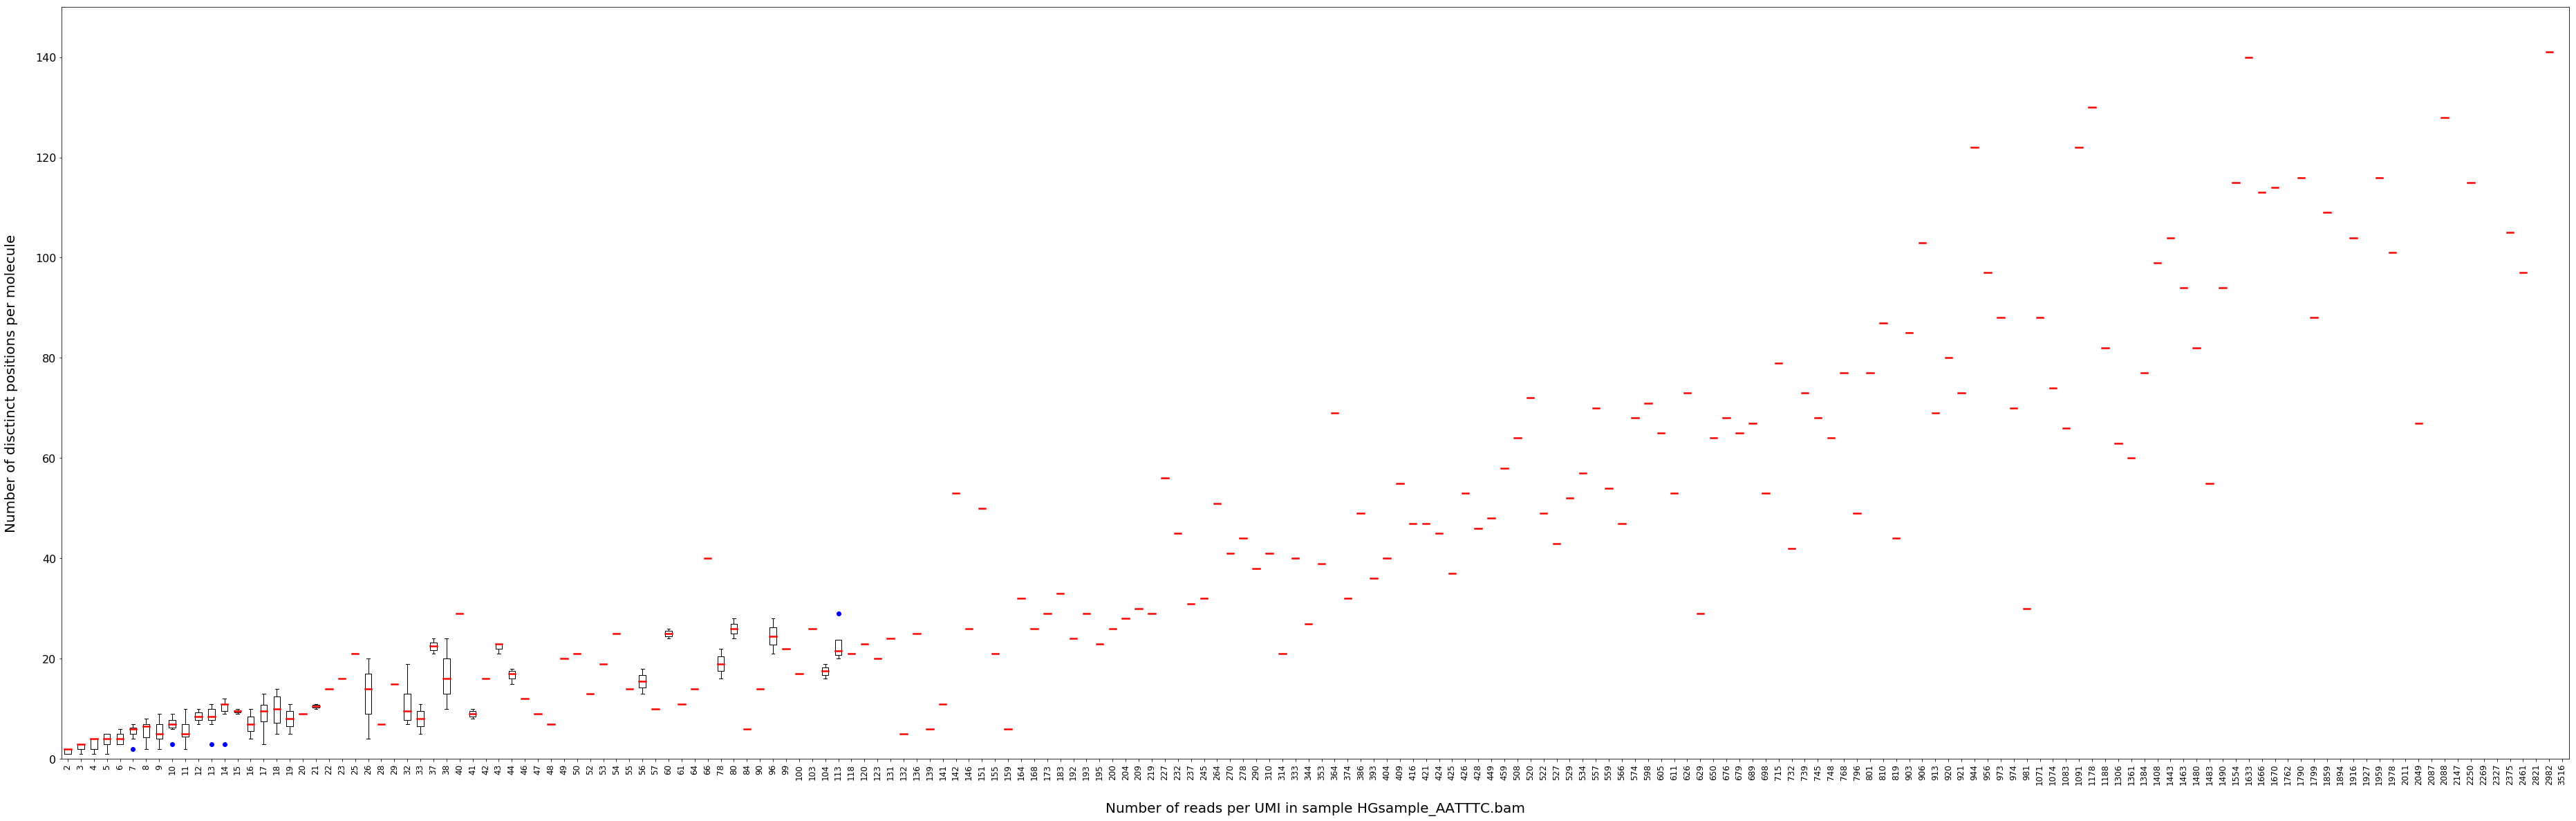

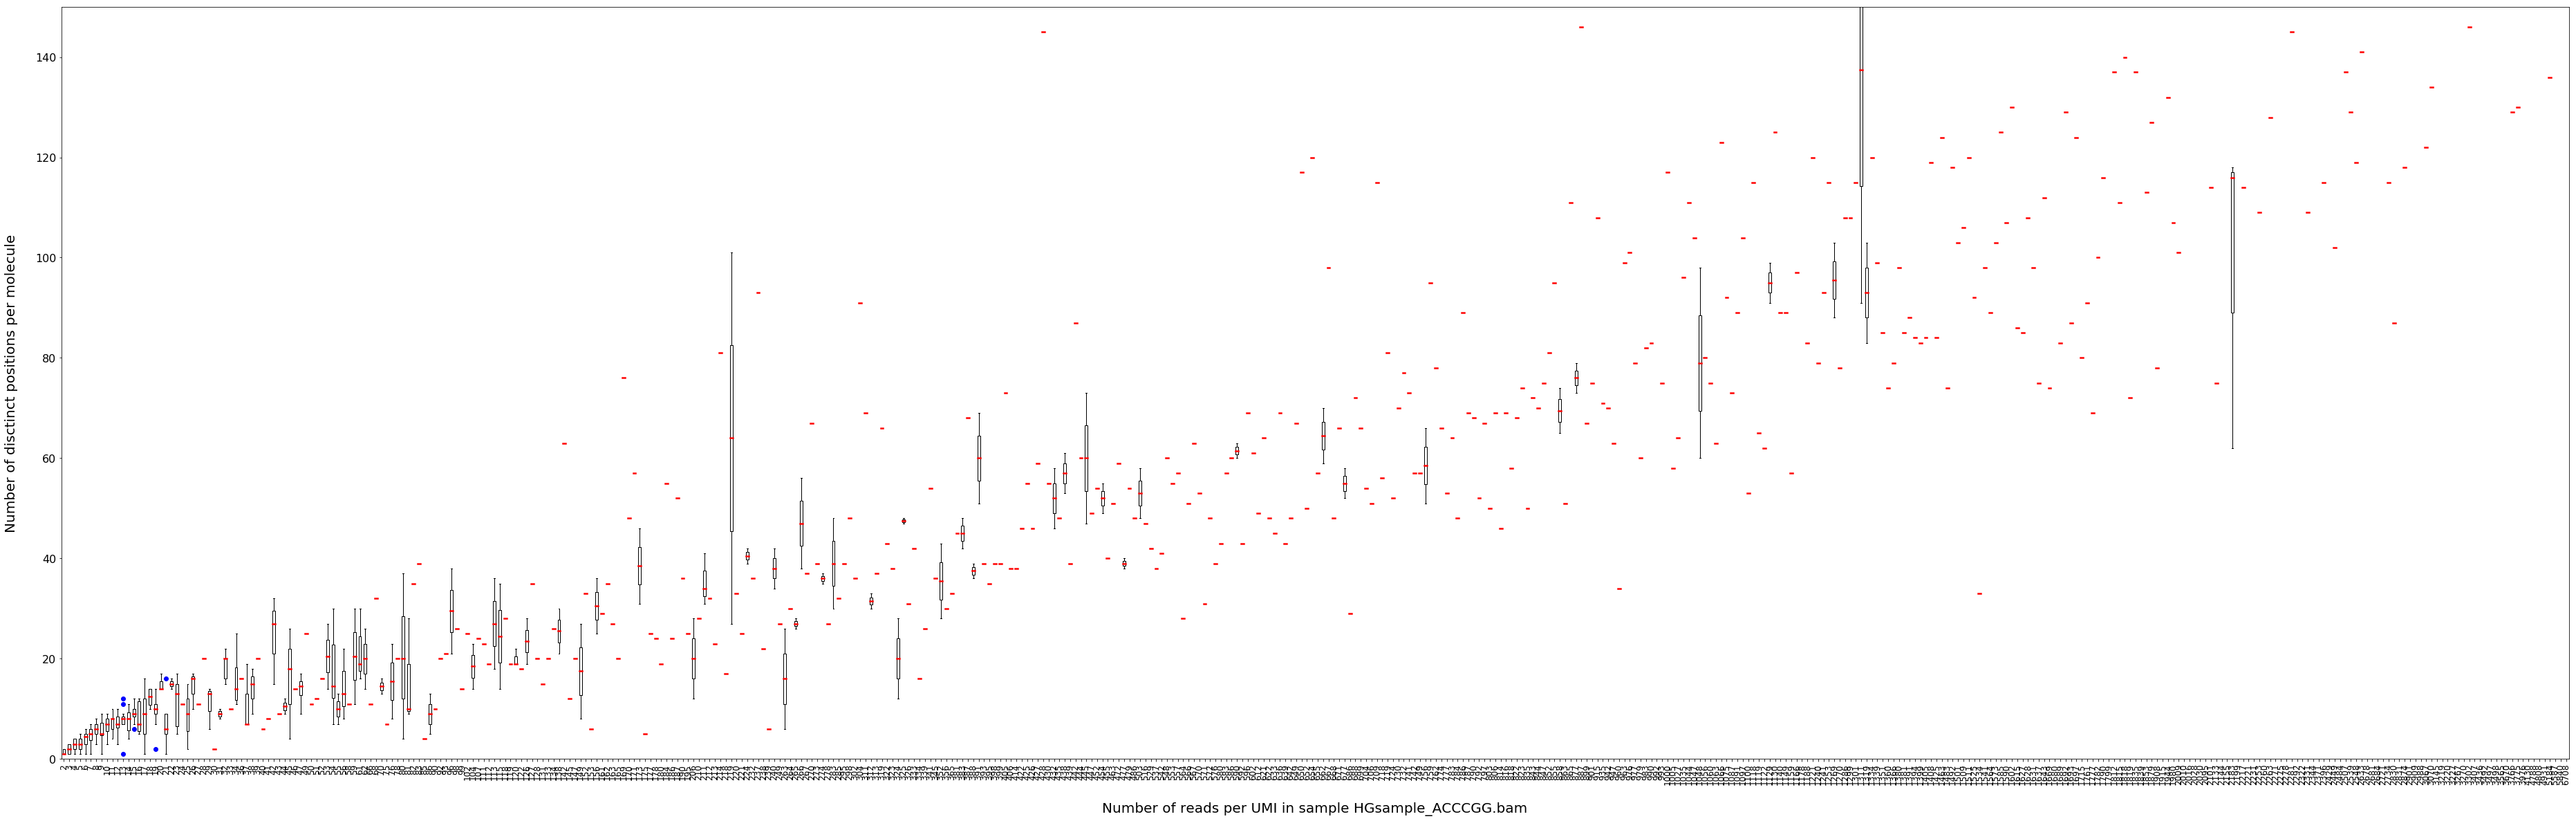

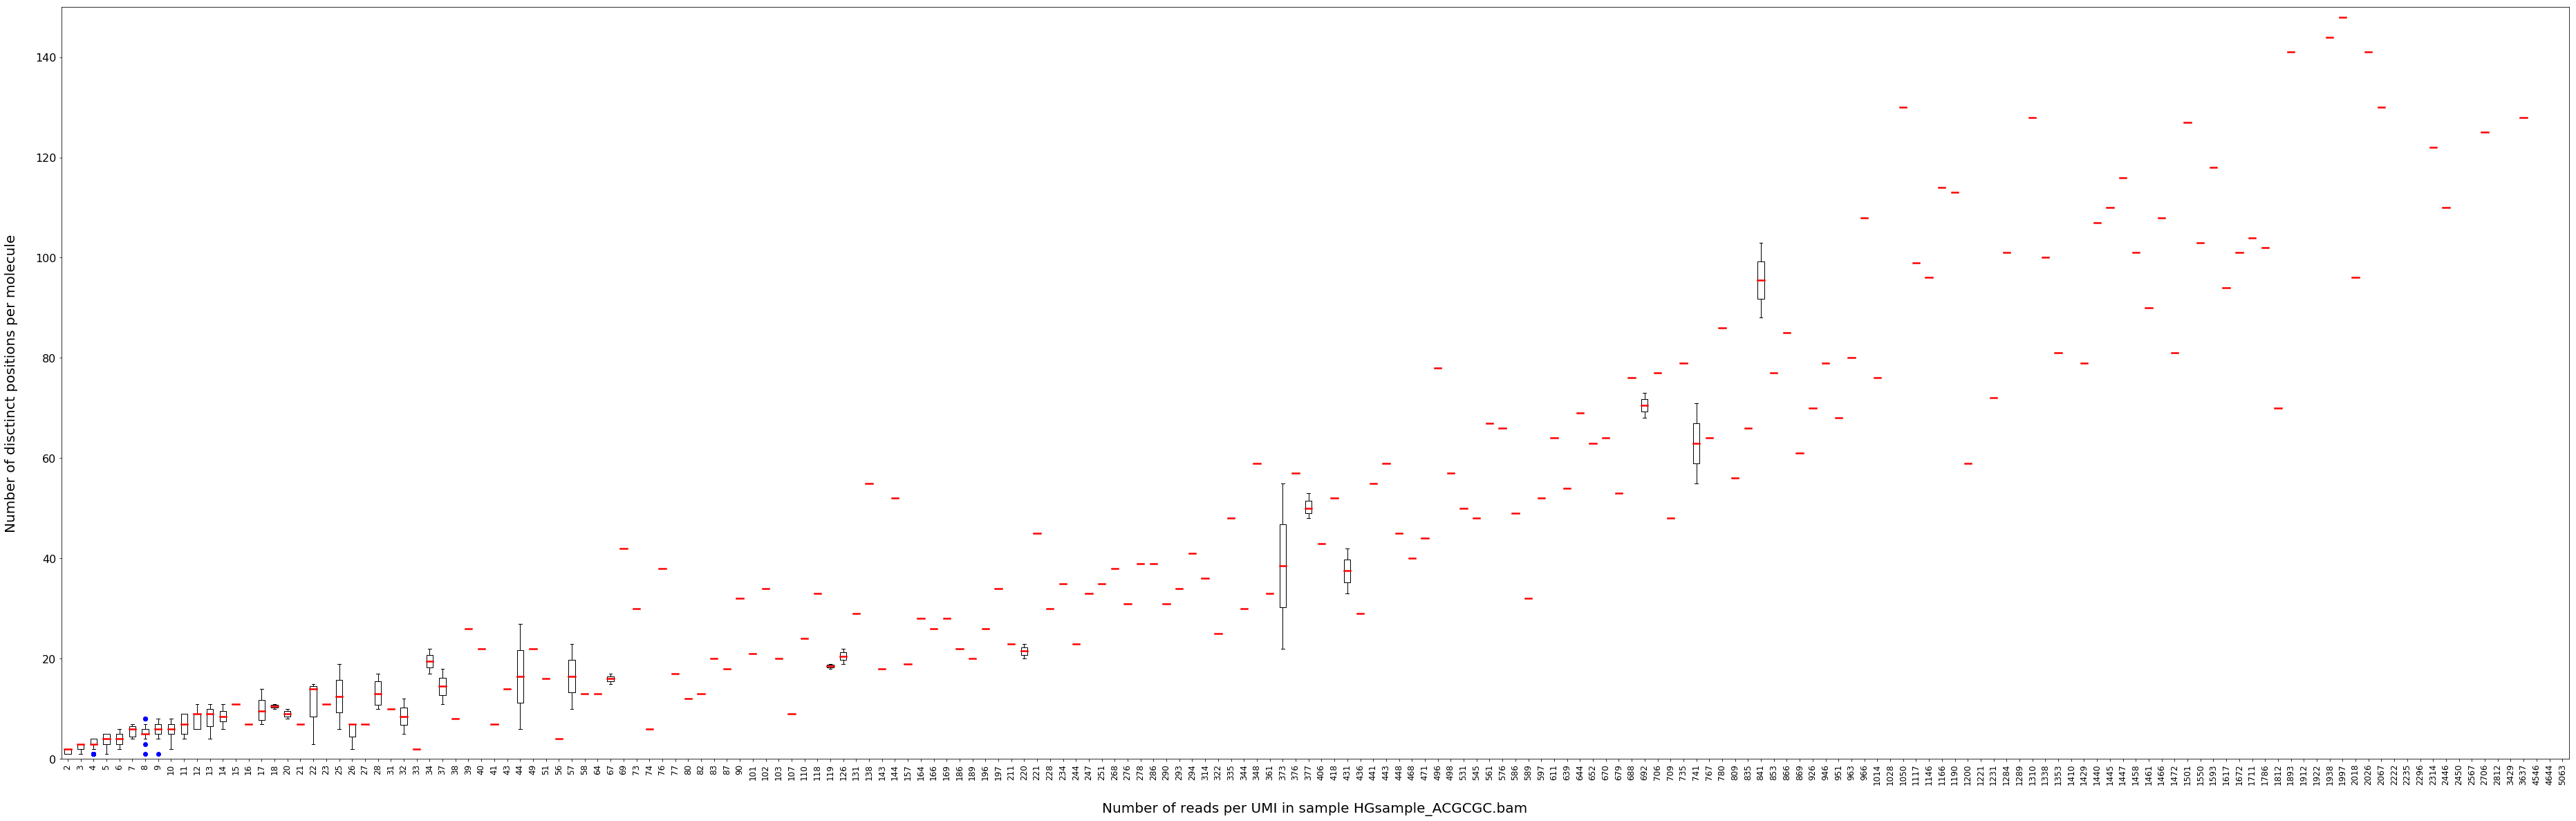

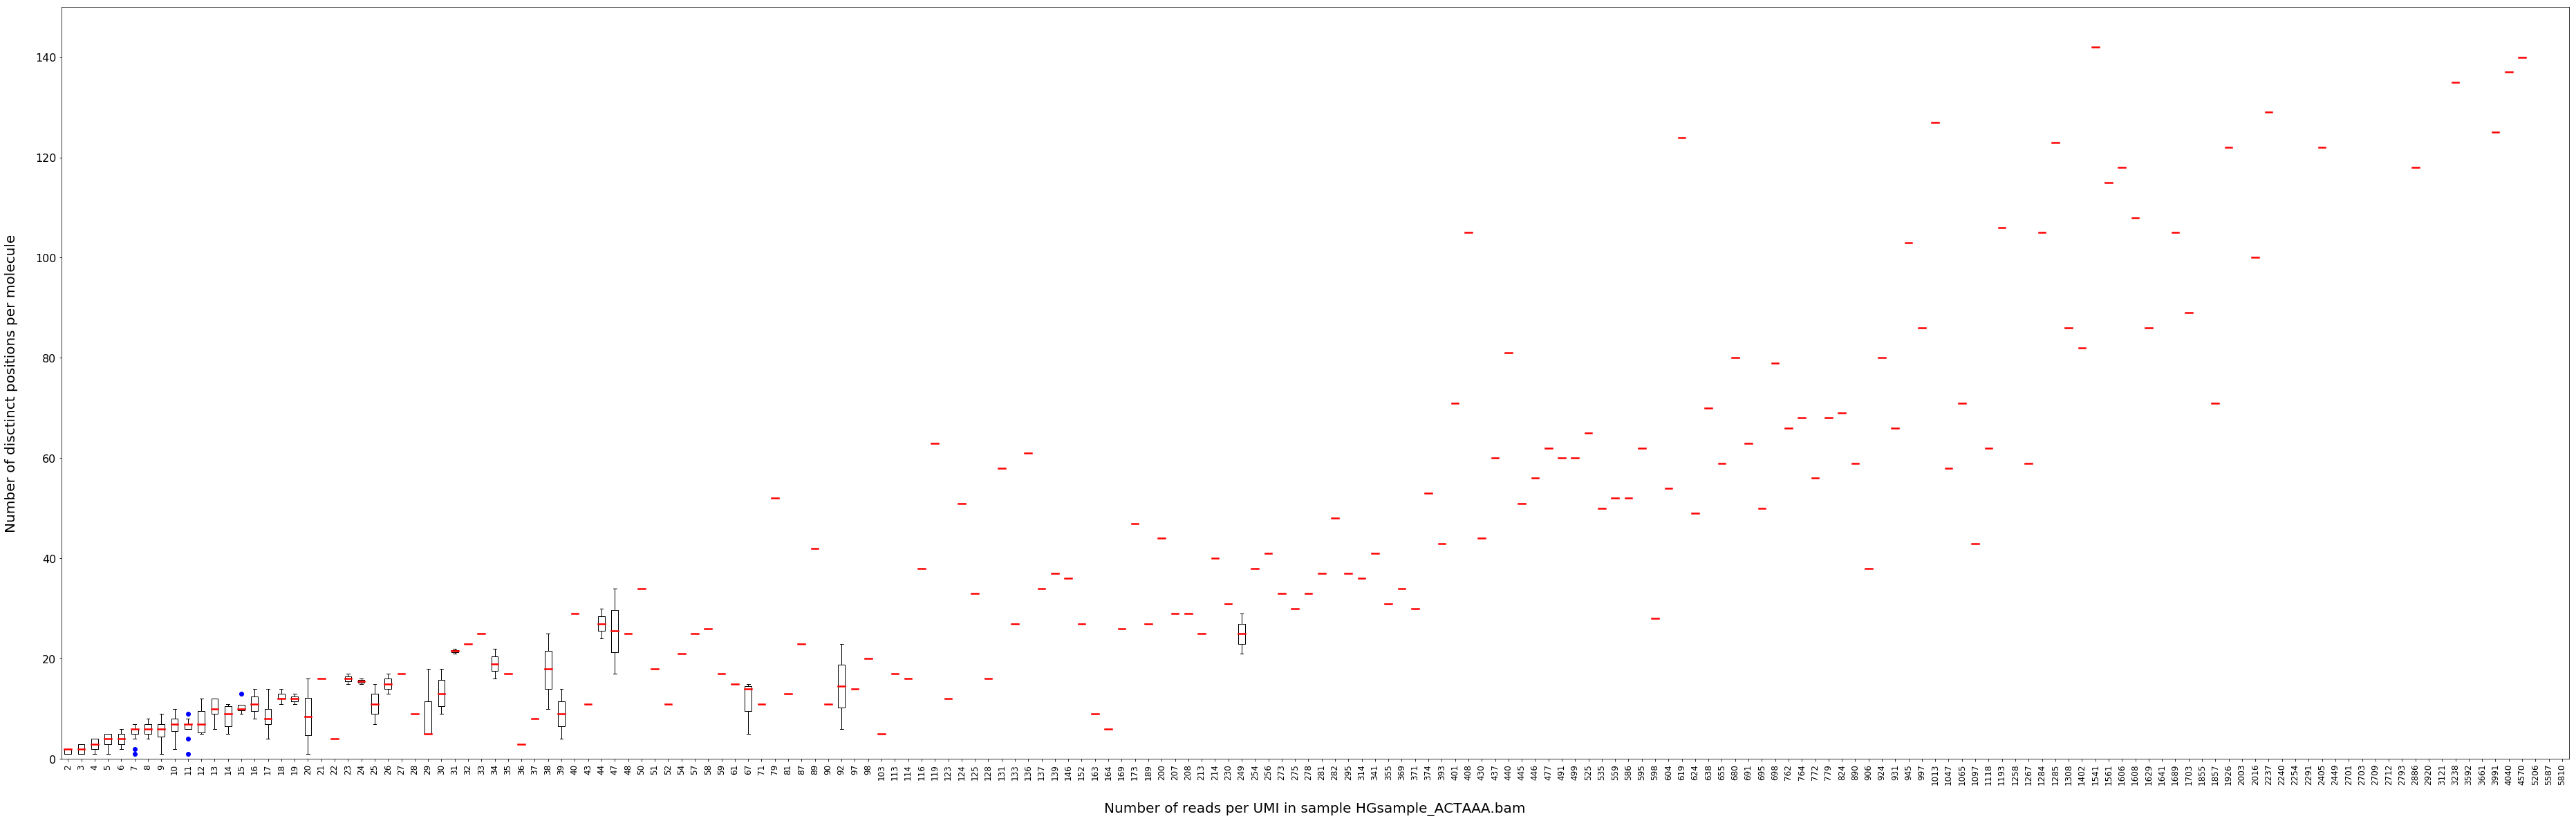

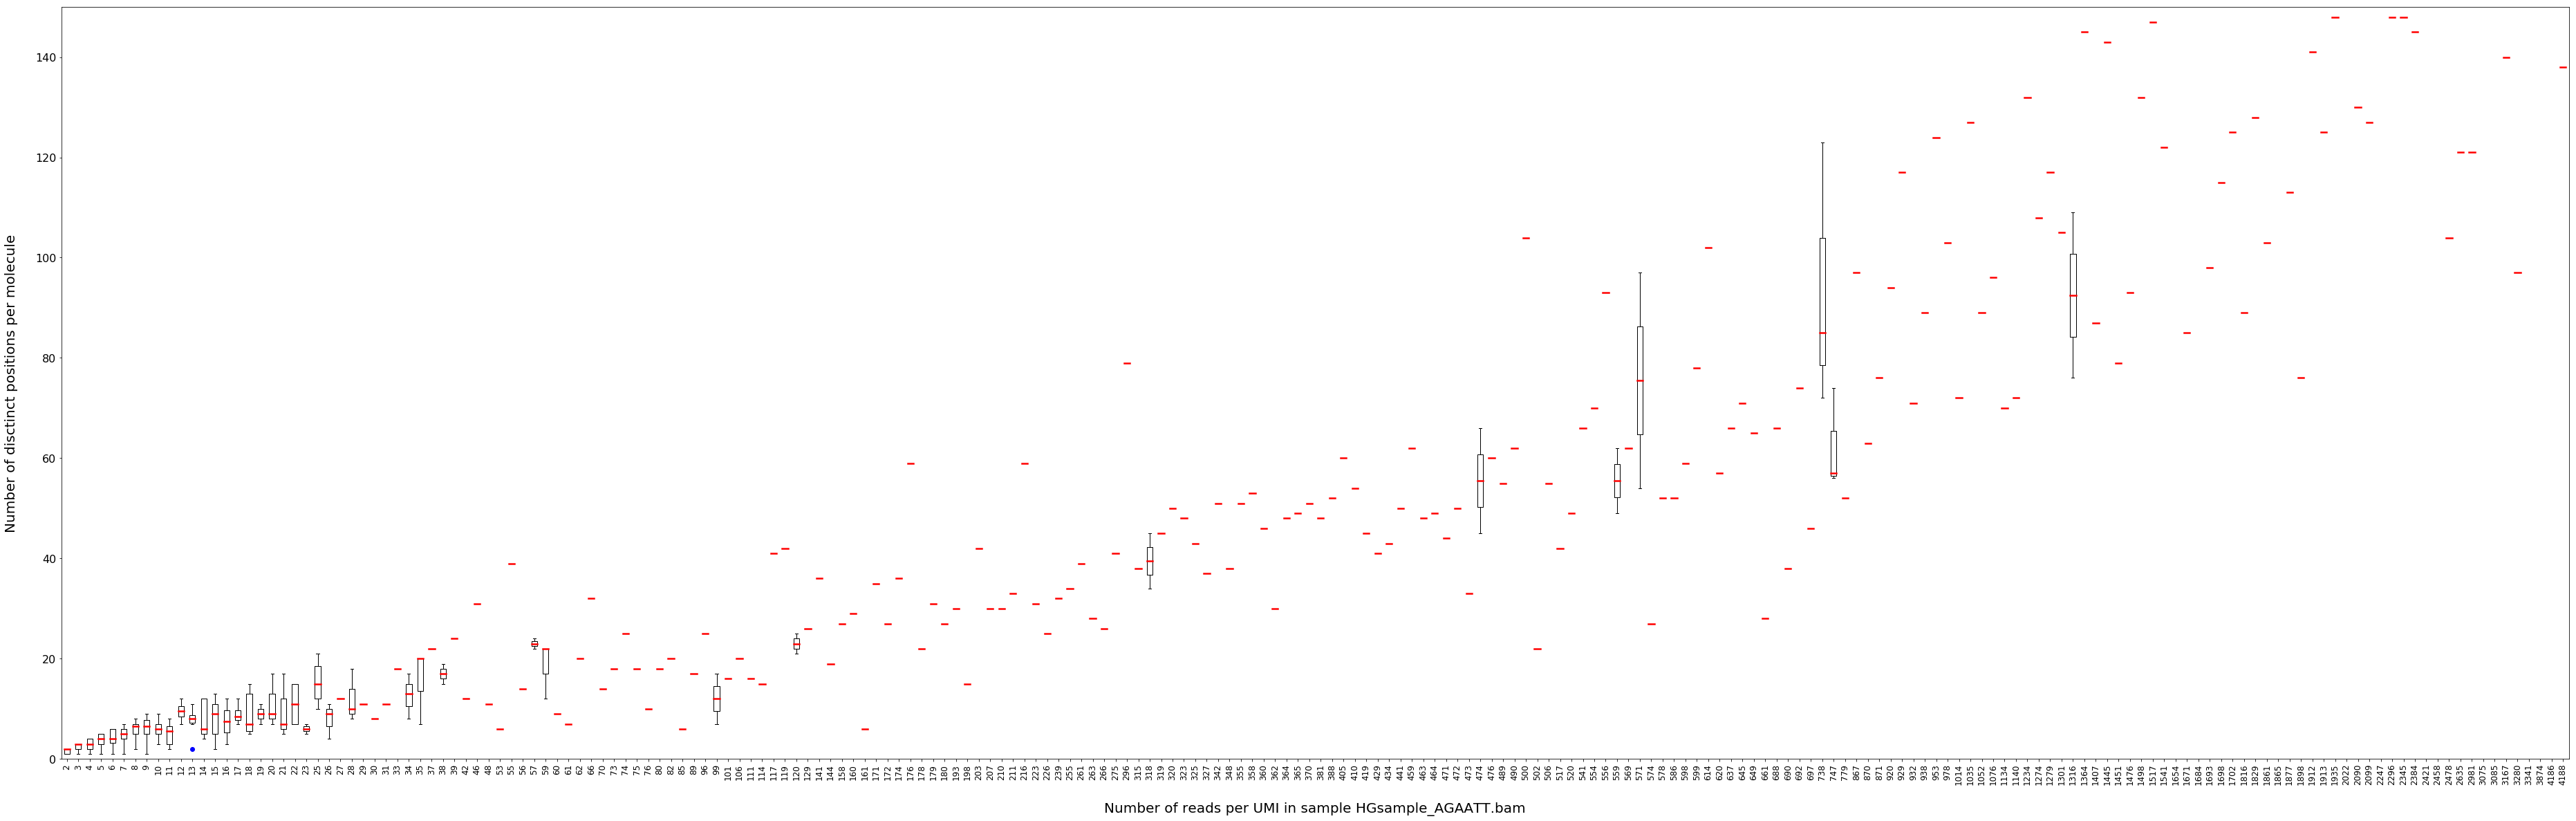

In [13]:
%%time

os.chdir("/data/parastou/UMI/data/HG/AMLPDXdemux/")

counter = 0

for in_file in glob.glob("*.bam"):
    if counter > 10:
        break
        
    data, labels = pos_per_reads_plot_data(in_file)
    plot_boxes(labels, data, counter, in_file)
        
    counter += 1

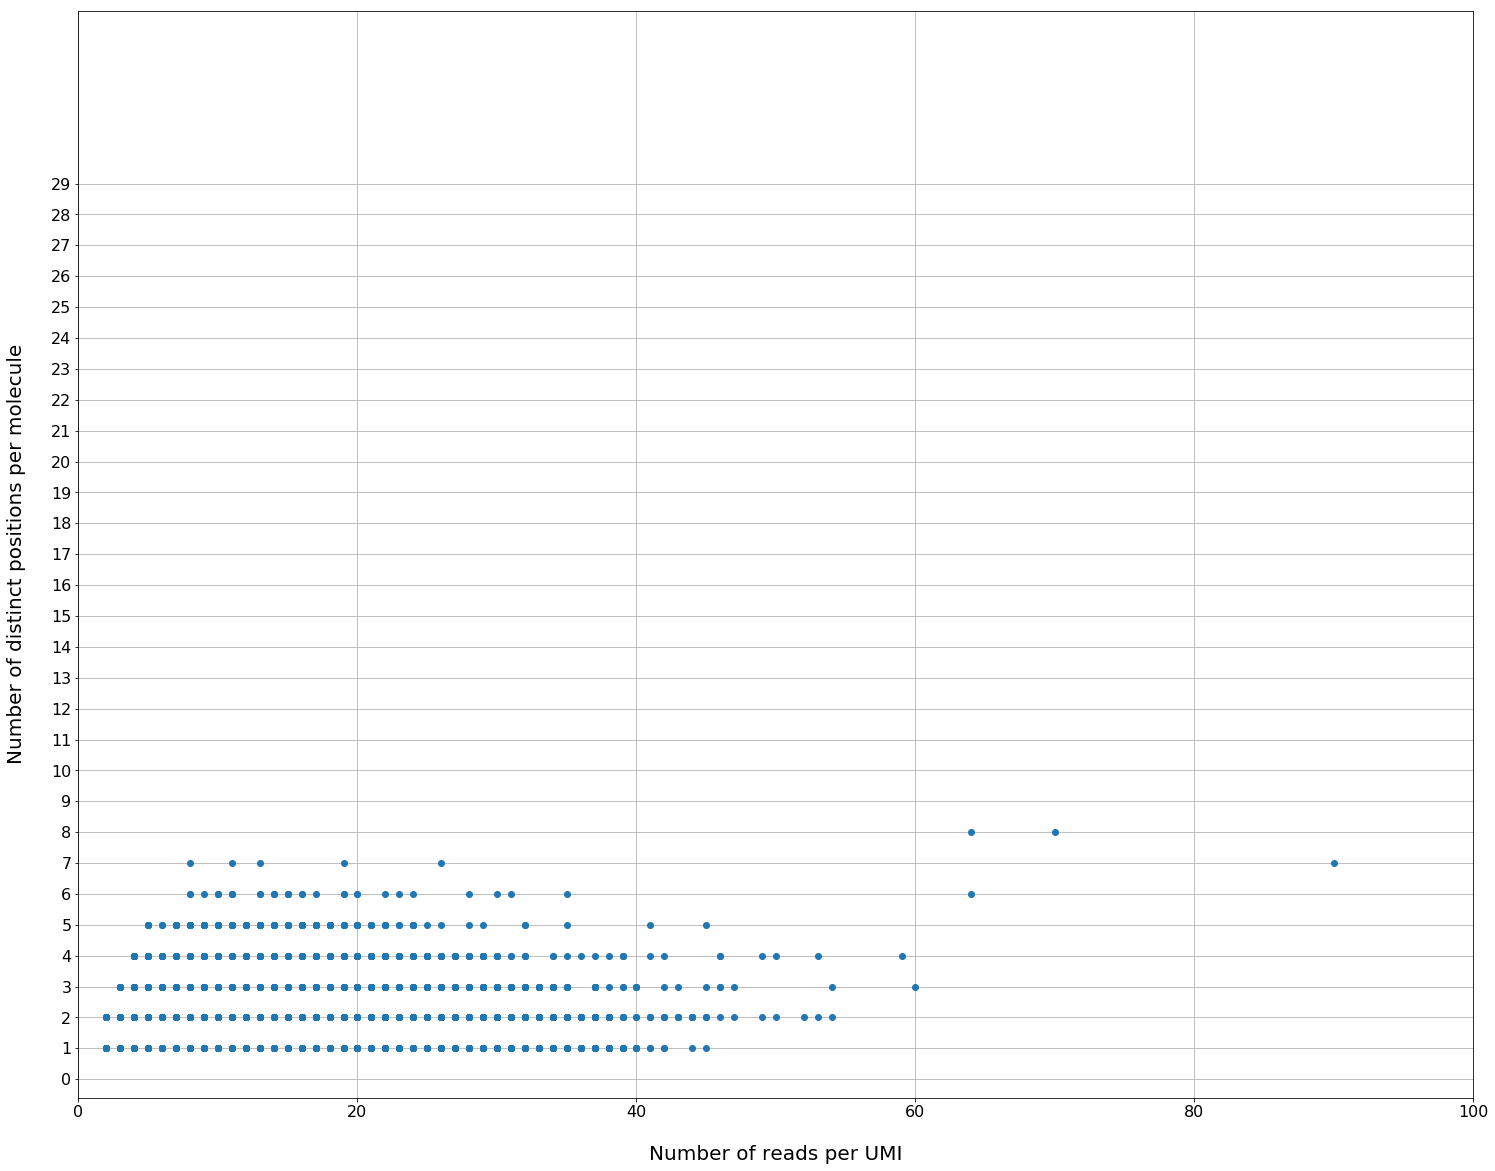

In [74]:
fig = plt.figure(figsize=(25,20))
ax = plt.subplot(1, 1, 1)
plt.grid()
ax.set_xlabel('Number of reads per UMI', fontsize=20, labelpad=25)
ax.set_ylabel('Number of distinct positions per molecule', fontsize=20, labelpad=25)
plt.plot(x, y, "o")
plt.xlim(0,100)
plt.yticks(range(0,30,1),fontsize = 16)
plt.xticks(fontsize = 16)
plt.savefig('scatter_dot_plot.png')

In [63]:
z = zip(x,y)
dc = {}
for i,j in z:
    if i in dc:
        dc[i].append(j)
    else:
        dc.update({i:[j]})

In [77]:
labels = dc.keys()
data = dc.values()

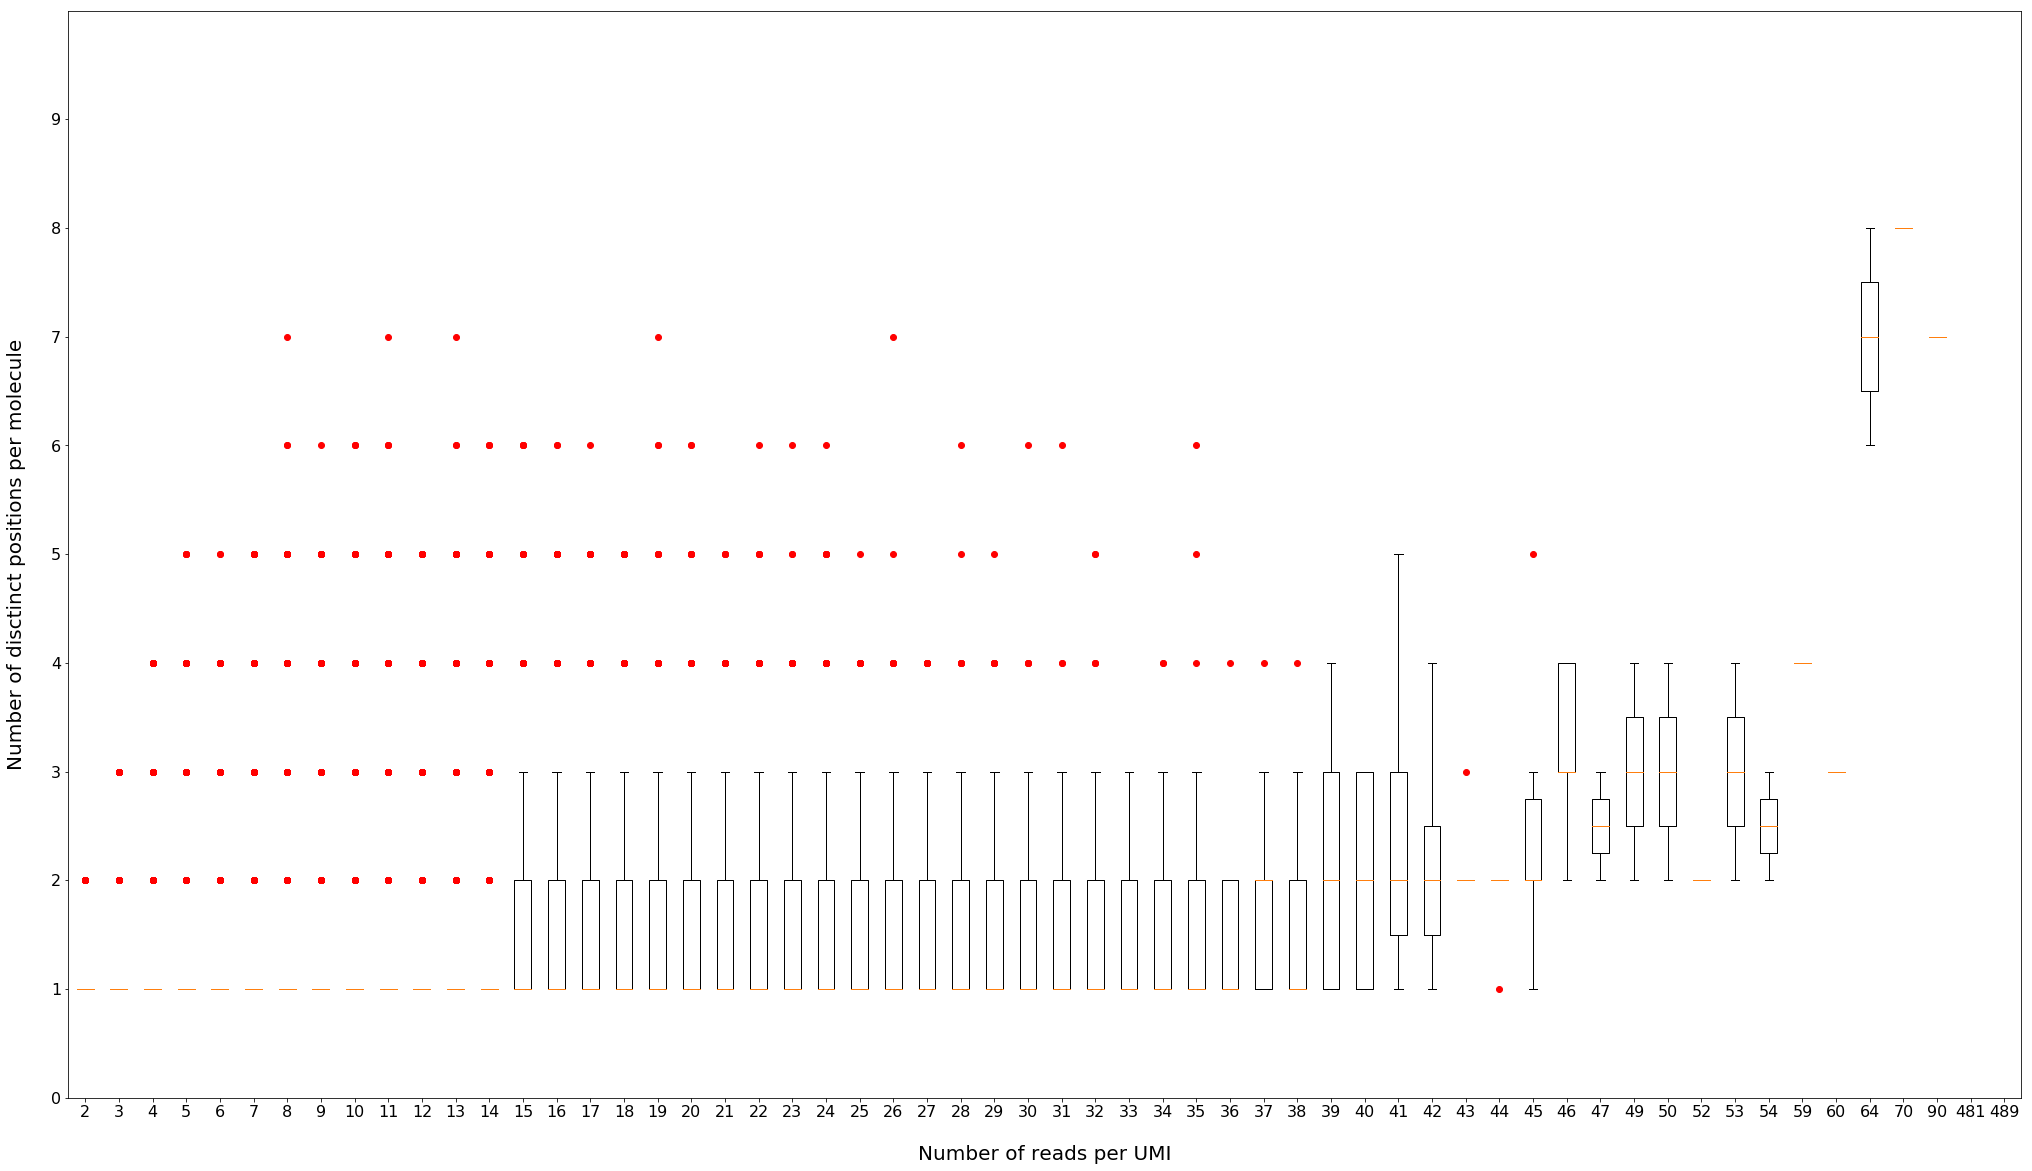

In [78]:
fig = plt.figure(figsize=(35,20))
plt.boxplot(data, sym='r')

locs, _ = plt.xticks()
#labels = [format(item * step_size,',') for item in locs]
plt.xticks(locs, labels, fontsize = 16)#, rotation='vertical')
plt.yticks(fontsize = 16)
plt.yticks(range(0,10,1))
plt.ylim(0,10)
plt.xlabel('Number of reads per UMI', fontsize=20, labelpad=25)
plt.ylabel('Number of disctinct positions per molecule', fontsize=20, labelpad=25)
plt.savefig('box_plot.png')

---------------------------

In [86]:
ones = 0
for item in data[:13]:
    ones += len(item)
    
more = 0
for item in data[13:]:
    more += len(item)
    
a = 0
for item in data:
    a += len(item)

In [88]:
print float(ones)/a * 100
print float(more)/a * 100

86.1443263911
13.8556736089


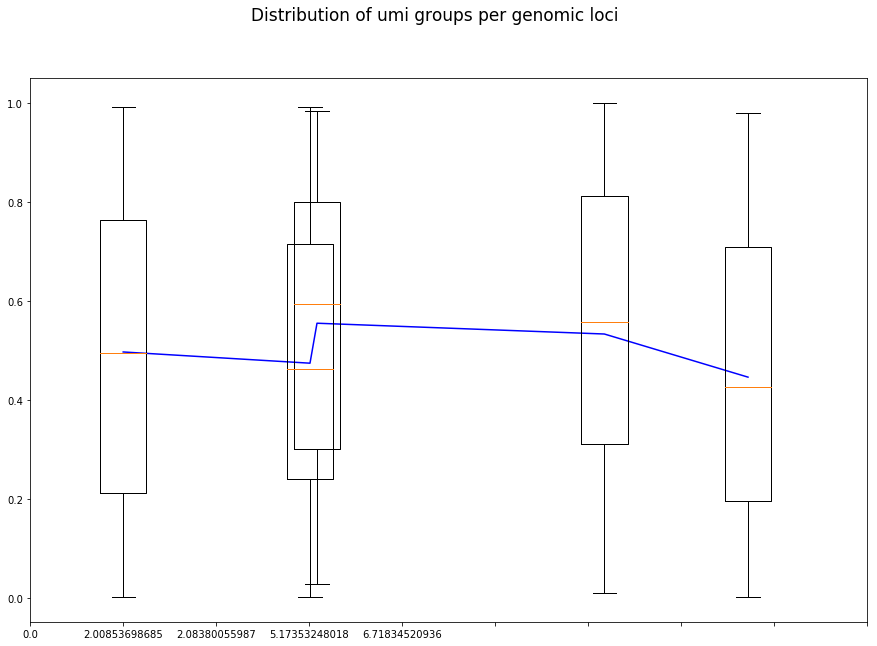

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data...
data = np.random.random((100, 5))
y = data.mean(axis=0)
x = np.random.random(y.size) * 10
x -= x.min()
x.sort()

# Plot a line between the means of each dataset
fig = plt.figure(figsize=(15,10))
fig.suptitle('Distribution of umi groups per genomic loci', fontsize=17)
plt.plot(x, y, 'b-')

# Save the default tick positions, so we can reset them...
locs, labels = plt.xticks() 

test = plt.boxplot(data, positions=x) #, notch=True)

# Reset the xtick locations.
plt.xticks(locs)

plt.show()

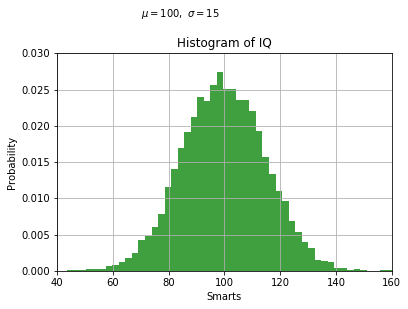

In [60]:
'''
for item in test['fliers']:
    print item.get_xdata()
'''
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(70, .035, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

/home/parastou/conda/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: This function is deprecated. Please call randint(0, 499 + 1) instead


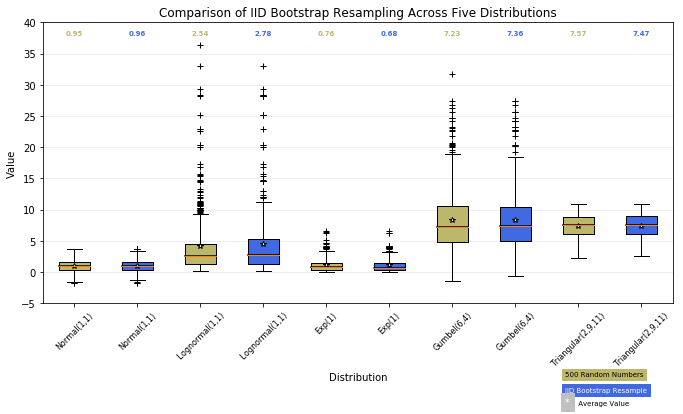

In [30]:
from itertools import islice
from random import sample

In [15]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

In [63]:
x = np.array([1, 7, 20, 50, 79])
y = np.array([10, 19, 30, 35, 51])
z = np.polyfit(np.log(x), y, 1)

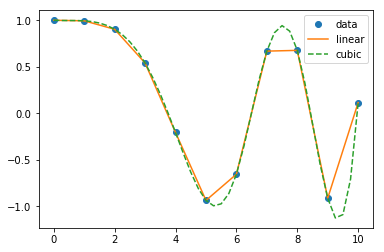

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]

[ 1.          0.99383351  0.90284967  0.54030231 -0.20550672 -0.93454613
 -0.65364362  0.6683999   0.67640492 -0.91113026  0.11527995]


In [68]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

print x
print
print y

In [8]:
Counter({1: 189128, 2: 2773, 3: 36})
Counter({1: 301160, 2: , 3: 202, 4: 6})
Counter({1: 373632, 2: , 3: 462, 4: 22})
Counter({1: 423349, 2: , 3: 799, 4: 37})
Counter({1: 459911, 2: , 3: 1233, 4: 62, 5: 4})
Counter({1: 487592, 2: , 3: 1685, 4: 105, 5: 5, 6: 1})
Counter({1: 509266, 2: , 3: 2213, 4: 153, 5: 12, 6: 1})
Counter({1: 527206, 2: , 3: 2733, 4: 202, 5: 17, 6: 1})
Counter({1: 542337, 2: , 3: 3259, 4: 256, 5: 26, 6: 1})
Counter({1: 555317, 2: , 3: 3805, 4: 322, 5: 33, 6: 3})
Counter({1: 566784, 2: , 3: 4427, 4: 394, 5: 43, 6: 6})
Counter({1: 576849, 2: , 3: 4977, 4: 502, 5: 52, 6: 4, 7: 2})
Counter({1: 586142, 2: , 3: 5586, 4: 591, 5: 65, 6: 8, 7: 3})
Counter({1: 594806, 2: , 3: 6142, 4: 706, 5: 77, 6: 9, 7: 4})
Counter({1: 602587, 2: , 3: 6796, 4: 821, 5: 96, 6: 9, 7: 4})
Counter({1: 610105, 2: , 3: 7420, 4: 909, 5: 121, 6: 12, 7: 4})
Counter({1: 613256, 2: , 3: 7721, 4: 957, 5: 126, 6: 13, 7: 4})

In [73]:
y = [0, 2773, 8004, 13696, 19508, 24850, 29838, 34484, 38953, 43115, 47085, 50853, 54449, 57755, 60946, 64043, 67055, 68496]
x = range(0, len(y), 1)

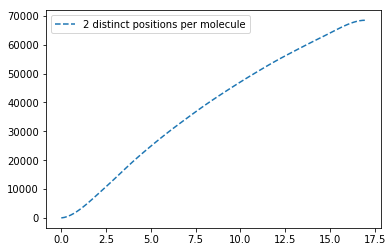

In [82]:
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 17, num=100, endpoint=True)
plt.plot(xnew, f2(xnew), '--')
plt.legend(['2 distinct positions per molecule'], loc='best')
plt.show()


In [31]:
print format(sum(r),',')
print format(sum(dup_r),',')

660,724
3,756,628


In [19]:
def gene_hits(l):
    s = set(l)
    genes = [i for i,j in s]
    return Counter(genes).values()

In [9]:
def gene_hits_with_duplicate(l):
    genes = [i for i,j in l]
    return Counter(genes).values()

In [11]:
dup_stats = []
for key, val in db.items():
    hits = []
    hits = gene_hits_with_duplicate(val)
    dup_stats += hits

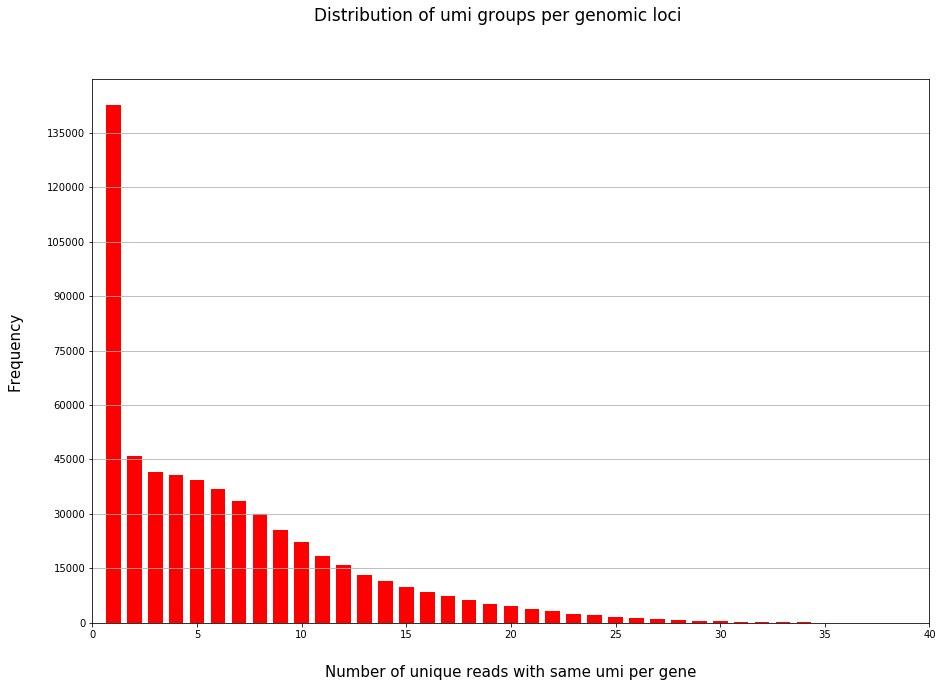

In [16]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Distribution of umi groups per genomic loci', fontsize=17)
plt.yticks(range(0,max(y),15000))
plt.xlim(0,40)
#plt.xticks(range(0, 90, 10))
ax = plt.subplot(1, 1, 1)
ax.yaxis.grid()
ax.set_xlabel('Number of unique reads with same umi per gene', fontsize=15, labelpad=25)
ax.set_ylabel('Frequency', fontsize=15, labelpad=25)
ax.bar(x, y, width=0.7, color='r', align='center')
plt.show()

In [13]:
x = Counter(dup_stats).keys()
y = Counter(dup_stats).values()
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 52,
 53,
 54,
 59,
 60,
 64,
 70,
 90,
 481,
 489]

In [16]:
stats = []
for key, val in db.items():
    hits = []
    hits = gene_hits(val)
    stats = stats + hits

In [ ]:
x = Counter(stats).keys()
y = Counter(stats).values()

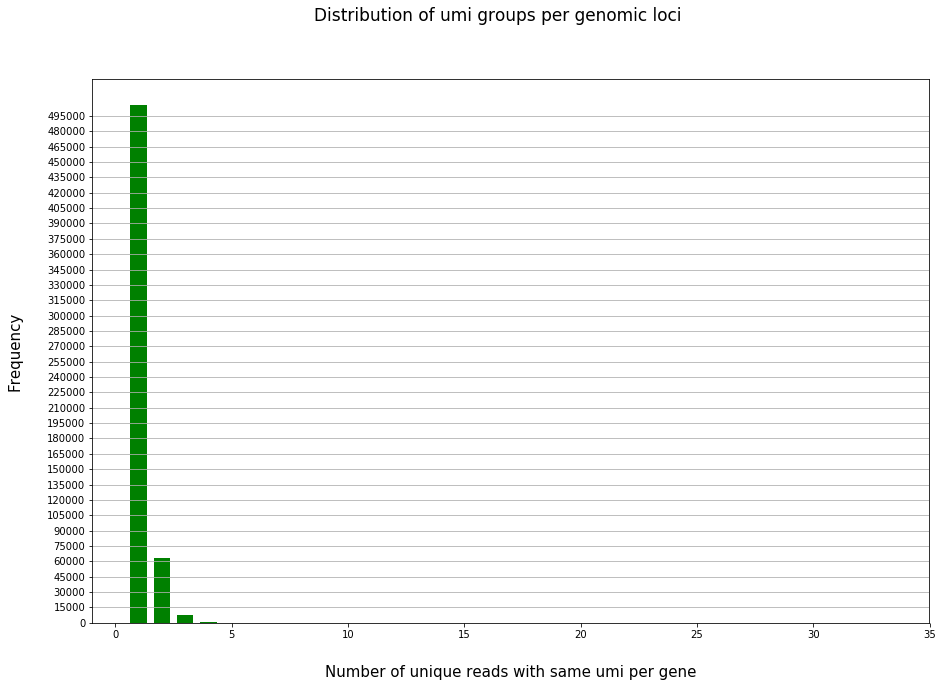

In [19]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Distribution of umi groups per genomic loci', fontsize=17)
plt.yticks(range(0,max(y),15000))
#plt.xlim(0,90)
#plt.xticks(range(0, 90, 10))
ax = plt.subplot(1, 1, 1)
ax.yaxis.grid()
ax.set_xlabel('Number of unique reads with same umi per gene', fontsize=15, labelpad=25)
ax.set_ylabel('Frequency', fontsize=15, labelpad=25)
ax.bar(x, y, width=0.7, color='g', align='center')
plt.show()

In [ ]:
def low_phred_base(phred_array, threshold=10):

    if np.sum(phred_array < threshold) > 0:
        return True
    else:
        return False